# 教程3:使用Eryn固定维度的MCMC

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from lisatools.utils.constants import *
from copy import deepcopy  # can be useful


在第三个教程中，我们将学习如何通过`Eryn`使用MCMC来进行我们的数据分析调查。在本教程中，我们将坚持使用简单的示例和简单的信号(如教程1)。在后续教程中，我们将使用eryn处理真实的GW信号。

## 任务1:建立自己的基本MCMC


为了更好地理解MCMC和`Eryn`，我们将从为一个简单的问题构建我们自己的MCMC算法开始。我们将使用以($\mu=0$)、单位标准差($\sigma=1$)和均匀先验为中心的单维高斯似然来实现这一点。

In [2]:
def log_like_gauss(x):
    return -0.5 * x ** 2 - 1/2 * np.log(2 * np.pi * 1.0) # 1.0 is sigma

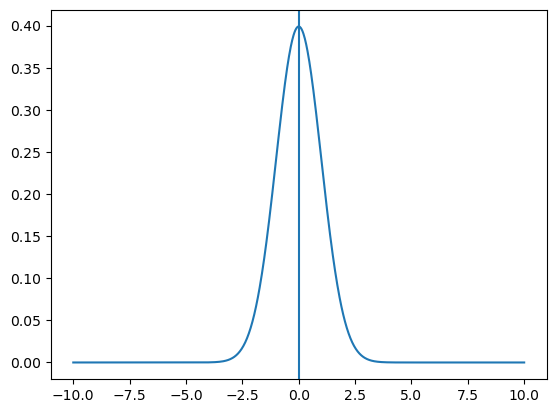

In [3]:
x_vals = np.linspace(-10.0, 10.0, 1000)
# notice the `exp` in there because we are working with the log of the likelihood.
plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))
plt.axvline(0.0)

我们将把它写成一个简单的循环。将样本收集到链表中。

In [5]:
num_steps = 100000

# get random starting point
current_point = np.random.uniform(-10.0, 10.0)
current_likelihood = log_like_gauss(current_point)
chain = []
for step in range(num_steps):
    # propose new point using a Gaussian distribution with standard deviation of 0.5
    # hint: use current + sigma * N() where N() is a draw from a normal distribution 
    # (np.random.randn)
    new_point = current_point + 0.5 * np.random.randn()

    # get new likelihood
    new_likelihood = log_like_gauss(new_point)

    # calculate the change in posterior
    # here we are using a uniform prior, so its value will not change, so for now do not
    # worry about the prior.
    delta_posterior = new_likelihood - current_likelihood  #  + (new_prior - old_prior)

    # accept or reject
    # if change in log posterior is greater than log(np.random.rand()), accept, else reject
    accept = delta_posterior > np.log(np.random.rand())

    if accept:
        current_point = new_point
        current_likelihood = new_likelihood

    chain.append(current_point)
    
    


现在画出这个链。你会注意到一开始需要一个“燃烧”阶段。因此，在计算后验概率时，你必须去掉它。有很多方法可以计算消耗多少能量是合适的，但我们在这里不做深入讨论。

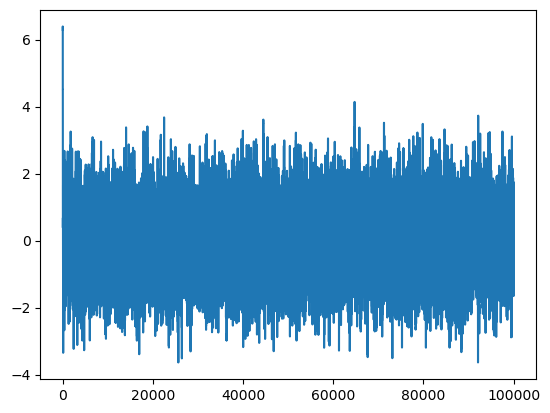

In [6]:
plt.plot(chain)


绘制MCMC生成的后验分布，并将其与上面的真实似然图进行比较。记住在构建直方图时设置`density=True`。

回过头来看，MCMC是一种从分布中抽取样本的方法。如果发行版像这个例子一样简单，它通常已经可用，不需要运行MCMC(像scipy那样)。然而，在我们的工作领域中，可能性分布往往很难处理，这就是MCMC对我们如此有用的原因。为了说明这一点，我们将从Numpy (`np.random.randn`)中提供的相同分布中抽取样本。

(array([5.14071882e-04, 1.77069204e-03, 2.39900211e-03, 4.28393235e-03,
        7.93955461e-03, 1.59933474e-02, 2.54751177e-02, 3.26721240e-02,
        5.17499027e-02, 7.30553263e-02, 1.06241522e-01, 1.45653700e-01,
        1.94319171e-01, 2.38757829e-01, 2.81083081e-01, 3.21294926e-01,
        3.67047323e-01, 3.86010864e-01, 3.99548090e-01, 3.90123439e-01,
        3.79270810e-01, 3.48997688e-01, 3.03016815e-01, 2.70801643e-01,
        2.14310855e-01, 1.71414413e-01, 1.28632209e-01, 9.48748217e-02,
        6.45445807e-02, 4.72946131e-02, 2.53037604e-02, 1.73642058e-02,
        1.37085835e-02, 7.48260183e-03, 4.51240874e-03, 1.99916843e-03,
        7.42548273e-04, 3.99833686e-04, 5.71190979e-05, 5.71190979e-05]),
 array([-3.6407115 , -3.44618618, -3.25166085, -3.05713553, -2.8626102 ,
        -2.66808488, -2.47355955, -2.27903422, -2.0845089 , -1.88998357,
        -1.69545825, -1.50093292, -1.3064076 , -1.11188227, -0.91735695,
        -0.72283162, -0.5283063 , -0.33378097, -0.13925565,

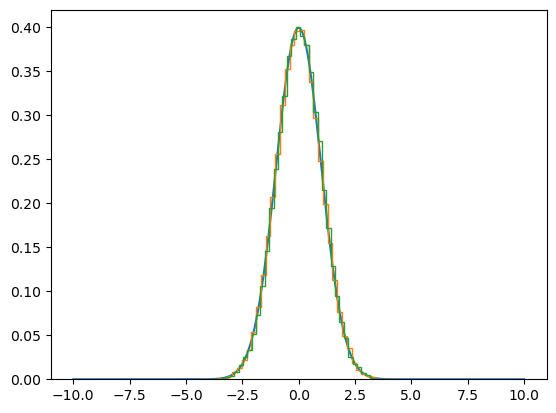

In [7]:
plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))
plt.hist(np.random.randn(100000), bins=40, density=True, histtype="step")
plt.hist(chain[10000:], bins=40, density=True, histtype="step")

## 任务2:使用Eryn重现上述结果。


现在使用`Eryn`中的`EnsembleSampler`来重现上述结果。如果你还在纠结，看看`Eryn`的教程。至于Eryn，你需要确定一个先验。使用`uniform_dist`创建一个简单的均匀分布。对于这个例子，你只需要关心Ensemble Sampler关键字参数。将这些都保留为默认值，只输入参数。

有用的文档:
* [EnsembleSampler](https://mikekatz04.github.io/Eryn/html/user/ensemble.html#eryn.ensemble.EnsembleSampler)
* [State](https://mikekatz04.github.io/Eryn/html/user/state.html#eryn.state.State)
* [uniform_dist](https://mikekatz04.github.io/Eryn/html/user/prior.html#eryn.prior.uniform_dist)
* [ProbDistContainer](https://mikekatz04.github.io/Eryn/html/user/prior.html#eryn.prior.ProbDistContainer)
* [Backend](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend)

In [8]:
# imports
from eryn.ensemble import EnsembleSampler
from eryn.state import State
from eryn.prior import uniform_dist, ProbDistContainer



在这里初始化采样器。之前的初始化应该采取如下形式:`ProbDistContainer({0: prior distribution})`。

In [9]:
prior = ProbDistContainer({
    0: uniform_dist(-1000.0, 1000.0)
})
nwalkers = 20
ndim = 1 
sampler = EnsembleSampler(nwalkers, 1, log_like_gauss, prior)

现在选择你的起点(每个walker一个)。你可以从先验中提取或者不提取。只要确保最后去除烧伤。然后把起始点放到一个`State`对象中。这里的关键是起点的形状应该是`(1,nwalkers, 1, ndim)`。这里的两个1表示温度(我们现在没有使用)，叶节点的数量或模型数量(这是RJ)。完成后，运行采样器。
文档:
* [run_mcmc](https://mikekatz04.github.io/Eryn/html/user/ensemble.html#eryn.ensemble.EnsembleSampler.run_mcmc)

In [10]:
start_point = prior.rvs(size=(1, nwalkers, 1))
start_state = State(start_point)

In [11]:
end_point = sampler.run_mcmc(start_state, 10000, progress=True)

100%|██████████| 10000/10000 [00:09<00:00, 1060.59it/s]


使用后端来检查输出链:

* [Backend](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend)

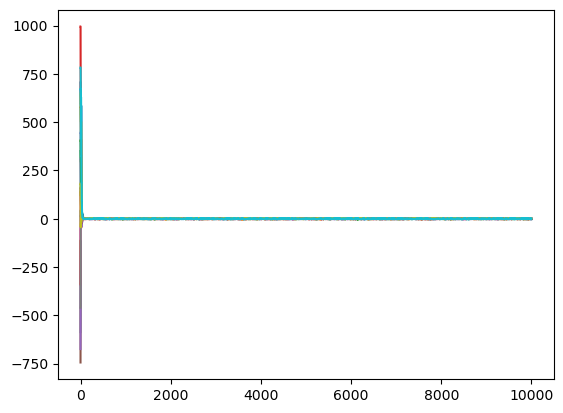

In [12]:
chain = sampler.get_chain()["model_0"]
for w in range(nwalkers):
    plt.plot(chain[:, 0, w, 0])


将输出链与注入的高斯分布进行比较。它们应该匹配。确保在绘制直方图时，设置`density=True`。

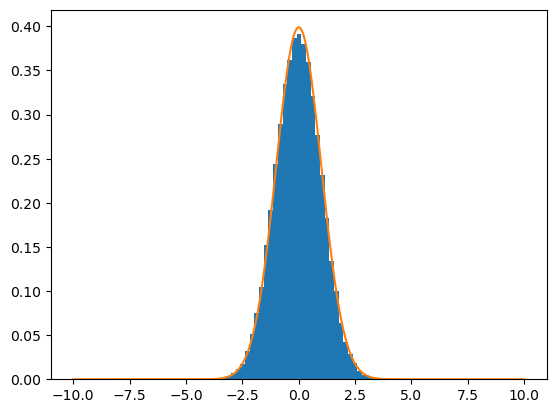

In [13]:
plt.hist(chain[1000:].flatten(), bins=40, density=True)
plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))

## 任务3:并行回火(Parallel Tempering)


现在我们将添加并行回火。为了检验addering的效果，我们将观察一个具有两个不同权重的高斯峰的一维分布。我们为这个练习提供了对数似然函数。你只需要设置x的极限来对分布进行适当的正态化。

并行化通过抑制与先验日志比较的对数似然来实现:`1/T * logL + logp`。这种效应降低了峰值，使较高温度的链更容易穿过似然表面的低似然部分。这有助于正确地对多种后验模式的分布进行采样。

我们将从不进行调和的采样开始，看看效果如何。然后我们将添加调温以查看改进。

In [14]:
from scipy.special import logsumexp

class LogLikeTwoGuass:
    def __init__(self, x_min: float, x_max: float):
        num_for_norm = 100000
        self.norm = 1.0
        x_vals = np.linspace(x_min, x_max, num_for_norm)
        y_vals = np.array([np.exp(self.log_like_two_gauss(x_tmp)) for x_tmp in x_vals])
        self.norm = np.trapz(y_vals, x=x_vals)
        
    def log_like_two_gauss(self, x):
        return logsumexp(np.array([(np.log(0.2) + -0.5 * (x - 50.0) ** 2), (np.log(0.8) + -0.5 * (x + 50.0) ** 2)]), axis=0) - np.log(self.norm)

In [15]:
like = LogLikeTwoGuass(-1000.0, 1000.0)

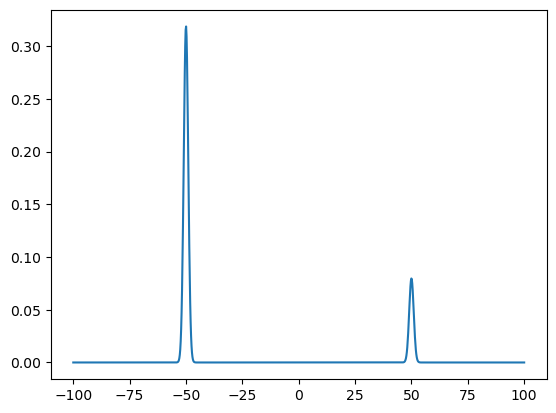

In [16]:
x_vals = np.linspace(-100.0, 100.0, 1000)
# notice the `exp` in there because we are working with the log of the likelihood.
plt.plot(x_vals, np.exp(like.log_like_two_gauss(x_vals)))
#plt.plot(x_vals, np.exp(np.array([like.log_like_two_gauss(x_tmp) for x_tmp in x_vals])))



从一个非钢化取样器开始。运行它并绘制注入概率的直方图。

In [17]:
prior = ProbDistContainer({
    0: uniform_dist(-1000.0, 1000.0)
})
nwalkers = 20
ndim = 1 
sampler = EnsembleSampler(nwalkers, 1, like.log_like_two_gauss, prior)

In [18]:
start_point = prior.rvs(size=(1, nwalkers, 1))
start_state = State(start_point)
sampler.run_mcmc(start_state, 10000, progress=True)

100%|██████████| 10000/10000 [00:13<00:00, 714.38it/s]


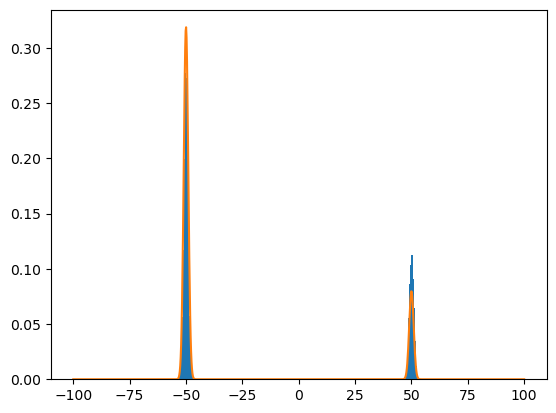

In [19]:
chain = sampler.get_chain()["model_0"][:, 0, :, 0]
plt.hist(chain[7000:].flatten(), bins=np.arange(-75., 75., 0.5), density=True)
plt.plot(x_vals, np.exp(np.array([like.log_like_two_gauss(x_tmp) for x_tmp in x_vals])))

### 问题

图看起来不正确。你觉得这是为什么?当不使用调适时，什么决定了每个峰值上的walker数量?


现在通过向`EnsembleSampler `提供`tempering_kwargs` kwarg `来添加温度。

有用的文档:
* [EnsembleSampler](https://mikekatz04.github.io/Eryn/html/user/ensemble.html#eryn.ensemble.EnsembleSampler)
* [TemperatureControl](https://mikekatz04.github.io/Eryn/html/user/temper.html#eryn.moves.tempering.TemperatureControl)

In [20]:
ntemps = 10
sampler_pt = EnsembleSampler(nwalkers, 1, like.log_like_two_gauss, prior, tempering_kwargs=dict(ntemps=ntemps, Tmax=np.inf))


再次从先验数据中采样起点，形状为`(ntemps, nwalkers, 1, ndim)`。然后运行采样器。

In [21]:
start_point = prior.rvs(size=(ntemps, nwalkers, 1))
start_state = State(start_point)
sampler_pt.run_mcmc(start_state, 10000, progress=True)

100%|██████████| 10000/10000 [00:56<00:00, 176.21it/s]


在注入分布上绘制链。

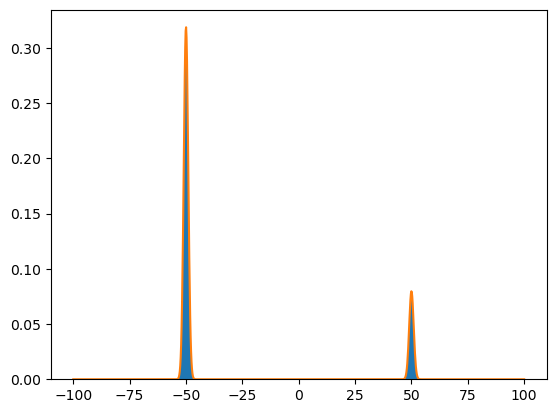

In [22]:
chain = sampler_pt.get_chain()["model_0"][:, 0, :, 0]
plt.hist(chain[1000:].flatten(), bins=np.arange(-75., 75., 0.5), density=True)
plt.plot(x_vals, np.exp(np.array([like.log_like_two_gauss(x_tmp) for x_tmp in x_vals])))

这些图应该非常匹配。你能描述一下发生的变化吗?

## 任务4(6):添加GWs!


现在我们将以第一篇教程中使用的简单正弦信号的形式添加GW信号。我们将从波形函数开始。设置`DataResidualArray`(注入任何你想要的参数)，`SensitivityMatrix`和`AnalysisContainer`。记住，我们在这个信号上没有响应，所以灵敏度曲线应该是`LISASens`。

In [23]:
from lisatools.datacontainer import DataResidualArray
from lisatools.analysiscontainer import AnalysisContainer
from lisatools.sensitivity import SensitivityMatrix, LISASens

我们将为您添加波形。

In [24]:
def sinusoidal_waveform(A: float, f0: float, phi0: float, t: np.ndarray, **kwargs) -> [np.ndarray, np.ndarray]:
    h1 = A * np.sin(2 * np.pi * (f0 * t) + phi0)
    h2 = A * np.cos(2 * np.pi * (f0 * t) + phi0)
    return [h1, h2]


生成注入数据，将其输入到`DataResidualArray`中，加载`SensitivityMatrix`，并将所有内容存储在`AnalysisContainer`中，包括正弦波形生成器。

In [25]:
dt = 10.0
t_arr = np.arange(100000) * dt
data = DataResidualArray(sinusoidal_waveform(1e-21, 2e-3, np.pi / 3, t_arr), dt=dt)
sens_mat = SensitivityMatrix(data.f_arr, [LISASens, LISASens])
analysis = AnalysisContainer(data, sens_mat, signal_gen=sinusoidal_waveform)

/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/numpy/fft/_pocketfft.py:70: ComplexWarning: Casting complex values to real discards the imaginary part
  r = pfi.execute(a, is_real, is_forward, fct)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:83: RuntimeWarning: divide by zero encountered in divide
  Sa_a = Sa_a_in * (1.0 + (0.4e-3 / frq) ** 2) * (1.0 + (frq / 8e-3) ** 4)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:85: RuntimeWarning: divide by zero encountered in power
  Sa_d = Sa_a * (2.0 * np.pi * frq) ** (-4.0)
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:87: RuntimeWarning: invalid value encountered in multiply
  Sa_nu = Sa_d * (2.0 * np.pi * frq / C_SI) ** 2
/root/anaconda3/envs/lisa_env/lib/python3.12/site-packages/lisatools/sensitivity.py:92: RuntimeWarning: divide by zero encountered in divide
  Soms_d = Soms_d_in * (1.0 + (2.0e-3 / f) ** 4)
/root/an


计算注入的信噪比。(`AnalysisContainer.calculate_signal_snr`)

In [26]:
analysis.calculate_signal_snr(1e-21, 2e-3, 0.0, t_arr)

(30.849156386054677, 15.424578193023093)

给出三个参数的先验分布。

In [27]:
priors = ProbDistContainer({
    0: uniform_dist(9e-22, 3e-21),
    1: uniform_dist(1.5e-3, 2.5e-3),
    2: uniform_dist(0.0, 2 * np.pi)
})


初始化采样器。对于似然函数，你可以使用` analysiscontainer .eryn_likelihood hood_function`。现在，我们不会使用回火。这种生成方案在可能性评估时间方面效率不高。我们将运行这个作为一个简单的例子。你可以稍后运行它，或者使用Eryn的`pool`功能并行化它。我们使用的这个基本示例说明了快速波形生成功能的必要性。

In [28]:
ndim = 3
sampler = EnsembleSampler(
    nwalkers,
    ndim, 
    analysis.eryn_likelihood_function,
    priors,
    args=(t_arr,)
)


生成启动状态并运行采样器。

In [29]:
start_state = State(priors.rvs(size=(1, nwalkers, 1)))
sampler.run_mcmc(start_state, 100, progress=True)

100%|██████████| 100/100 [00:09<00:00, 10.29it/s]



如果需要的话，你可以检查概率链和(或)似然值，但可能需要运行更长的时间才能得到合理的结果。

### 问题

我们可以做哪些事情来加速这个计算?将其转换为波形环境。

## 任务5(4): 计算证据


利用Eryn的热力学积分计算单峰高斯分布的证据。用10个walker和50个温度开始。您可以稍后使用这些数字，并观察它们对测量的影响。在运行`run_mcmc`时使用`burn` kwarg。**重要提示**:对于`EnsembleSampler`的`tempering_kwargs`关键字参数，你必须添加到字典中:`stop_adaptation=burn`。这将适应燃烧期间的温度，然后在记录样本时保持固定。

有用的文档:
* [thermodynamic_integration_log_evidence](https://mikekatz04.github.io/Eryn/html/user/utils.html#eryn.utils.utility.thermodynamic_integration_log_evidence)

In [30]:
# imports
from eryn.utils.utility import thermodynamic_integration_log_evidence


初始化采样器。运行MCMC。

In [31]:
nwalkers = 10
ntemps = 50
burn = 2000
sampler_pt_2 = EnsembleSampler(nwalkers, 1, log_like_gauss, prior, tempering_kwargs=dict(stop_adaptation=burn, ntemps=ntemps, Tmax=np.inf))

start_point = prior.rvs(size=(ntemps, nwalkers, 1))
start_state = State(start_point)
sampler_pt_2.run_mcmc(start_state, 10000, burn=burn, progress=True)

100%|██████████| 10000/10000 [00:52<00:00, 189.69it/s]



1) 计算每个温度链中**所有样本和步行者**的平均可能性。
2) 从采样器后端获得逆温度(`beta `)，并确保它们在整个运行过程中相同。
3) 计算证据。

有用的文档:
* [thermodynamic_integration_log_evidence](https://mikekatz04.github.io/Eryn/html/user/utils.html#eryn.utils.utility.thermodynamic_integration_log_evidence)
* [Backend.get_log_like](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend.get_log_like)
* [Backend.get_betas](https://mikekatz04.github.io/Eryn/html/user/backend.html#eryn.backends.Backend.get_betas)

In [32]:
logl_avg = sampler_pt_2.get_log_like().mean(axis=(0, 2))
betas = sampler_pt_2.get_betas()[-1]
assert np.all(betas == sampler_pt_2.get_betas()[0])
logz = thermodynamic_integration_log_evidence(betas, logl_avg)
print(logz)

(-16.368260032796094, 88.0497552345976)


## 任务6(5): 模型选择


使用证据的热力学积分对高斯脉冲和柯西脉冲进行模型比较。


这是脉冲函数和似然值。我们将假设每个脉冲都有振幅和均值参数。标准差设为1。

In [33]:
from scipy.stats import cauchy
def gaussian_pulse(x, a, b):
    f_x = a * np.exp(-((x - b) ** 2) / (2 * 1.0 ** 2))
    return f_x

def cauchy_pulse(x, a, b):
    f_x = a * cauchy.pdf(x - b)
    return f_x

def log_like_fn(params, t, data, sigma, which_template):

    pulse_gen = gaussian_pulse if which_template == "gauss" else cauchy_pulse
    template = pulse_gen(t, *params)

    ll = -0.5 * np.sum(((template - data) / sigma) ** 2, axis=-1)
    return ll

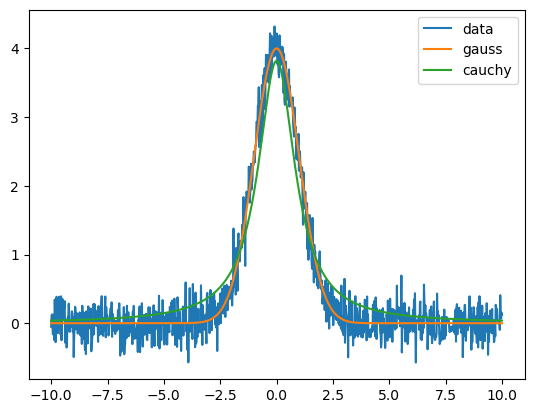

In [34]:
t_vals = np.linspace(-10.0, 10.0, 1000)
sigma = 0.2
amp_true = 4.0
mean_true = 0.0
true_data = gaussian_pulse(t_vals, amp_true, mean_true)
data = true_data + np.random.randn(*t_vals.shape) * sigma
cauchy_data = cauchy_pulse(t_vals, amp_true * 3, mean_true)
plt.plot(t_vals, data, label="data")
plt.plot(t_vals, true_data, label="gauss")
plt.plot(t_vals, cauchy_data, label="cauchy")
plt.legend()
# plt.plot(x_vals, np.exp(log_like_fn()))
# plt.plot(x_vals, np.exp(log_like_gauss(x_vals)))


我们需要为每个模型运行单独的采样对象。

两个模型的先验是完全相同的。振幅先验应跨越注入值。平均先验应该跨越时间域。

为每个对象初始化先验，采样器，为每个对象采样一个起点，并使用我们上面使用的设置运行两个采样器。

In [35]:
priors = {}
samplers = {}
burn = 1000
for name in ["gauss", "cauchy"]: 
    priors[name] = ProbDistContainer({
    0: uniform_dist(0.0, 40.0),
    1: uniform_dist(t_vals.min(), t_vals.max())
})
    samplers[name] = EnsembleSampler(
        nwalkers,
        2,
        log_like_fn,
        priors,
        branch_names=[name],
        tempering_kwargs=dict(stop_adaptation=burn, ntemps=ntemps, Tmax=np.inf),
        args=(t_vals, data, sigma, name)
    )

    start_point = priors[name].rvs(size=(ntemps, nwalkers, 1))
    start_state = State({name: start_point})
    samplers[name].run_mcmc(start_state, 10000, burn=burn, progress=True)
    

100%|██████████| 10000/10000 [04:38<00:00, 35.94it/s]


对两个模型重复上面的计算。然后求贝叶斯因子。

In [36]:
logz_out = {}
for name in ["gauss", "cauchy"]: 
    logls = samplers[name].get_log_like().mean(axis=(0, 2))
    betas = samplers[name].get_betas()
    assert np.all(betas[-1] == betas[0])
    logz, dlogz = thermodynamic_integration_log_evidence(betas[0], logls)
    print(name, logz, dlogz)
    logz_out[name] = logz

print("2log(Bayes Factor):", 2 * (logz_out["gauss"] - logz_out["cauchy"]))

gauss -532.691928879491 37.89814090100026
cauchy -998.6971651298059 31.913436014038325
2log(Bayes Factor): 932.0104725006297


### 问题

如果我们改变噪声，这会对我们的结果有什么影响?

# 学习总结和收获概述

## 教程结构和内容
1. 理论介绍:
开头部分介绍了MCMC的基本概念和在LISA数据分析中的应用以及参数估计和模型比较中的地位。
2. 模型和参数:
定义了两种统计分布模型——高斯（Gaussian）和柯西（Cauchy）分布
3. MCMC:
使用EnsembleSampler类实现了MCMC采样（一种用于从概率分布中抽样的算法）
4. 贝叶斯因子计算:
计算了两个模型的贝叶斯因子，用来衡量两个统计模型的相对质量
5. 模拟与分析:
本教程中使用了大量模拟的，评估了不同模型在描述数据时的有效性，并通过贝叶斯因子比较它们。
## 学习总结
通过这个教程，我学到了MCMC方法的基础，并理解如何用它来进行复杂的统计分析，包括参数估计和模型比较。（同时帮助我复习了相关的概率与数理统计的知识(手动doge)）
在教程的引导下，我使用了Python和相关库（如emcee）来实现MCMC算法（在这个过程中也渐渐熟悉了安装库的流程）。当然也接触了模型比较中贝叶斯因子的计算和应用。
